In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\Surface\Loan_Default.csv")
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [4]:
# count of non-Null for each column  + Dtype 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

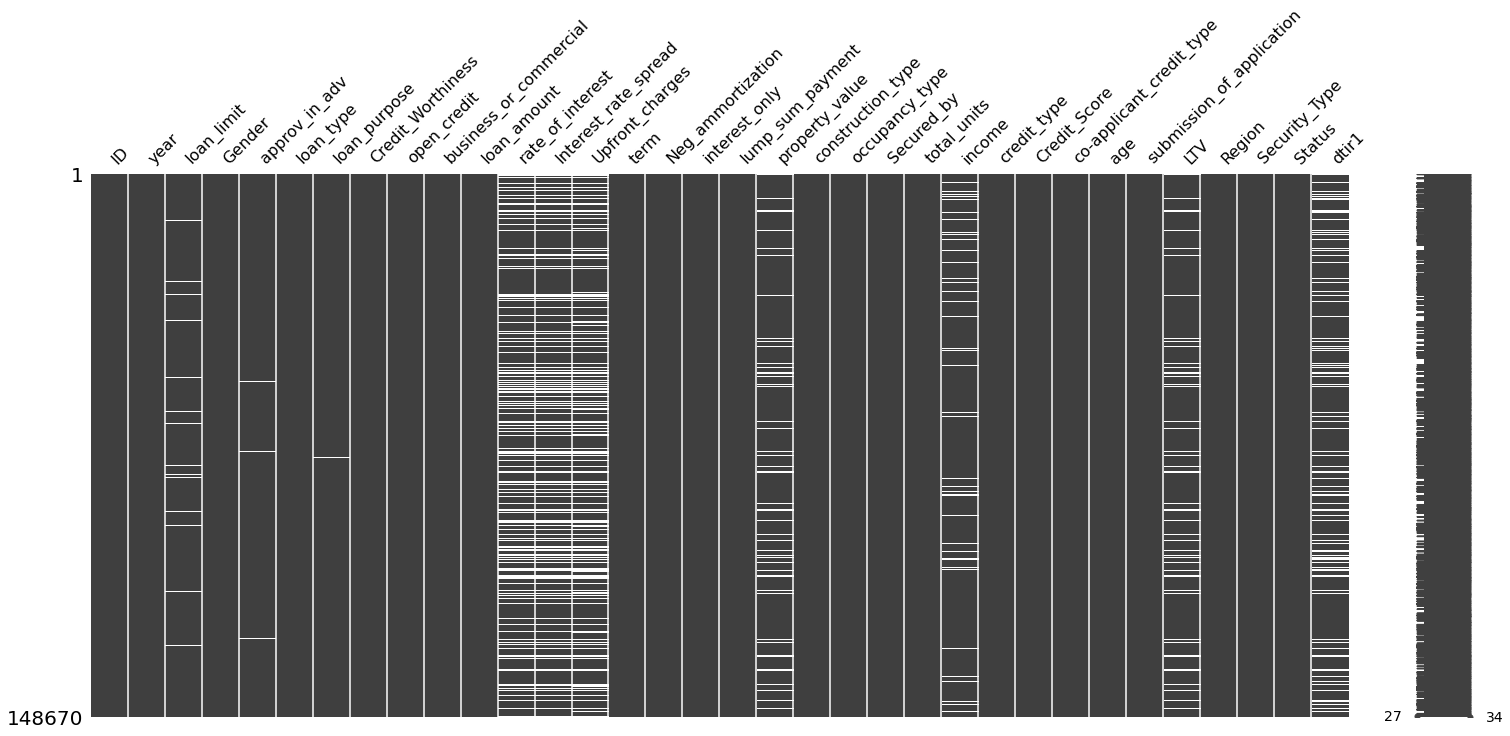

<Figure size 1080x648 with 0 Axes>

<AxesSubplot:>

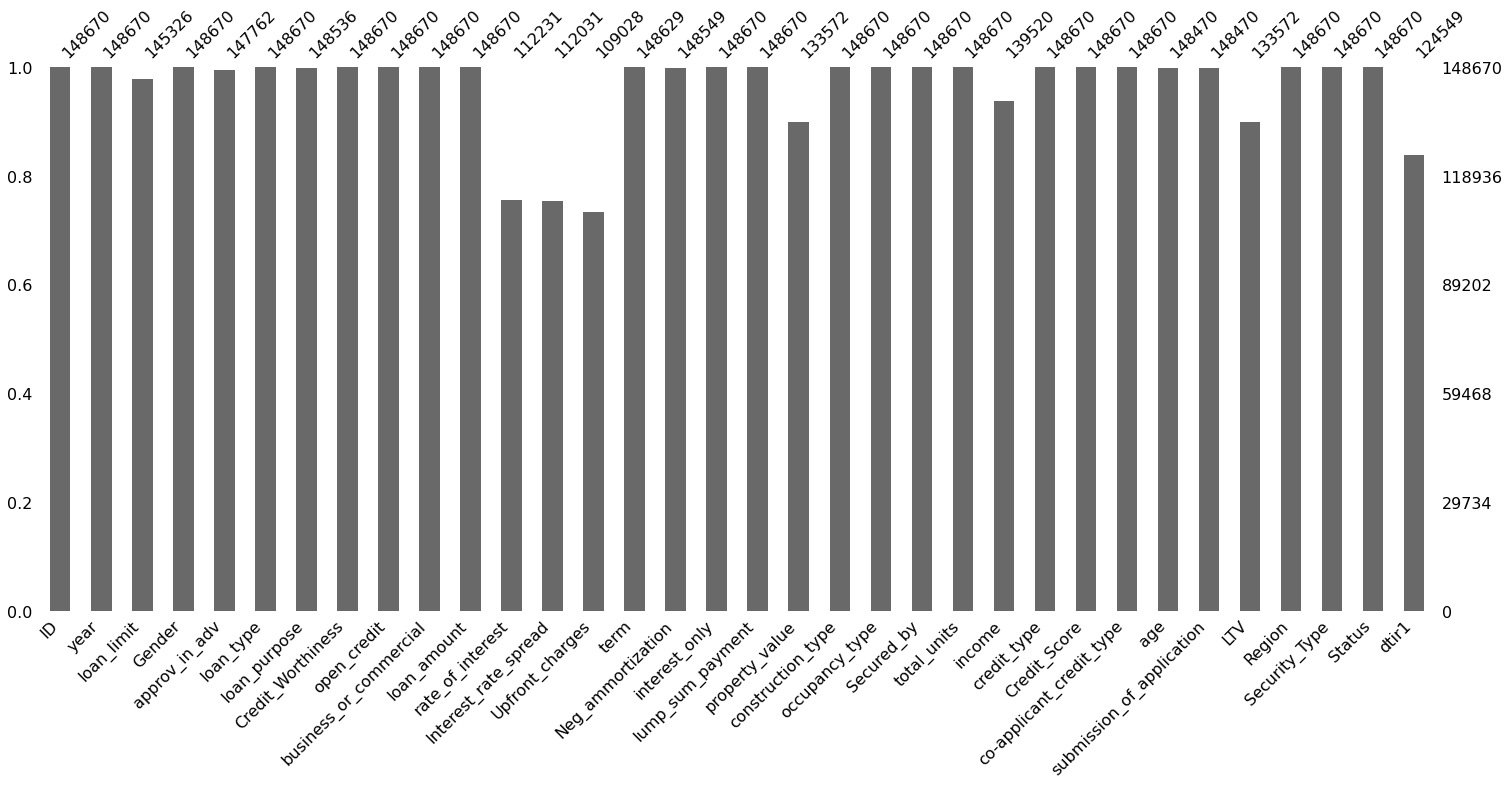

In [19]:
#  ------- Missing values ----------

import missingno as msno

# missing values using Matrix (allows us to see the distribution of data across all columns in the whole dataset)

msno.matrix(df)
plt.figure(figsize = (15,9))
plt.show()

# missing value using bar chart
msno.bar(df)

<AxesSubplot:>

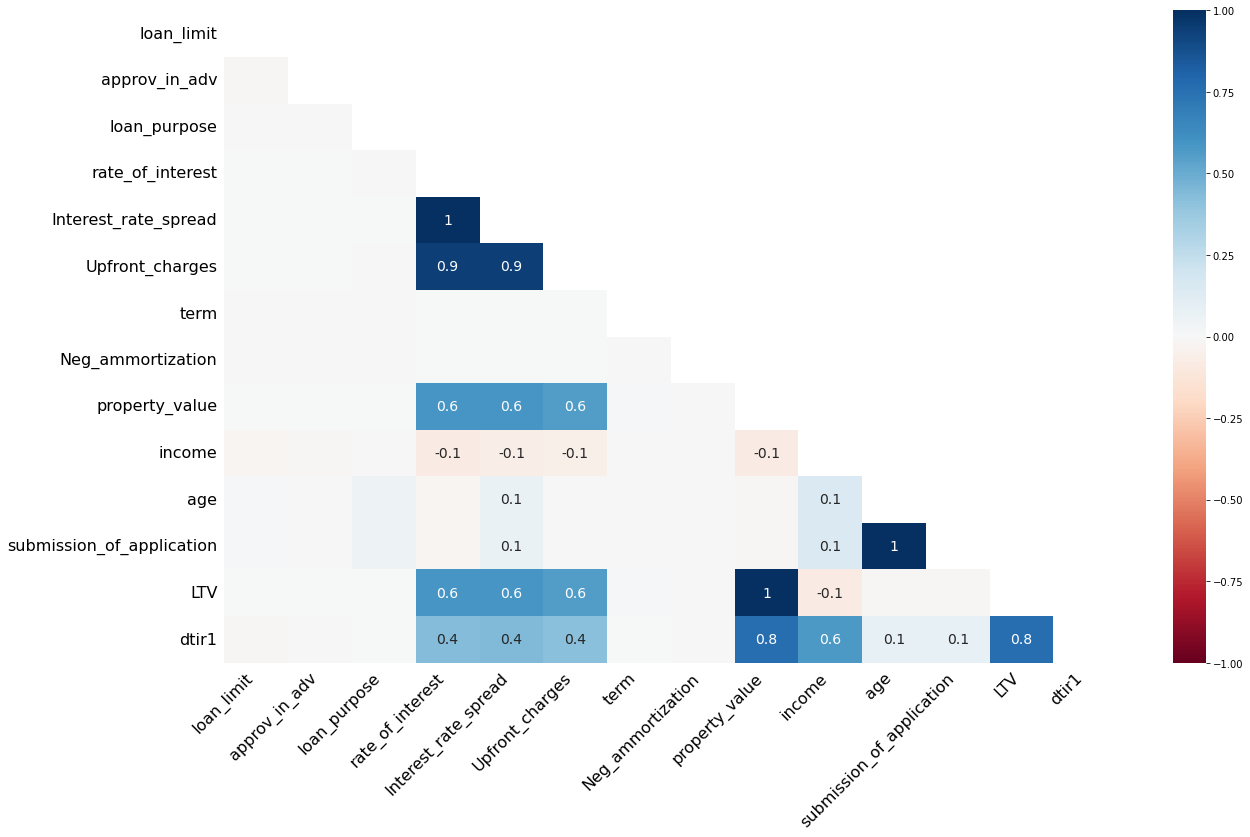

In [20]:
#missing values using correlation Heatmap( measures nullity correlation between columns of the dataset )
# 0 : no dependence | 1: if col present the other col certainly present | -1: if col present the other col certainly absent

msno.heatmap(df,labels=True)

In [21]:
# list of missing columns
missing_column = [col for col in df.columns if df[col].isnull().sum()>0]
missing_column


['loan_limit',
 'approv_in_adv',
 'loan_purpose',
 'rate_of_interest',
 'Interest_rate_spread',
 'Upfront_charges',
 'term',
 'Neg_ammortization',
 'property_value',
 'income',
 'age',
 'submission_of_application',
 'LTV',
 'dtir1']

<AxesSubplot:>

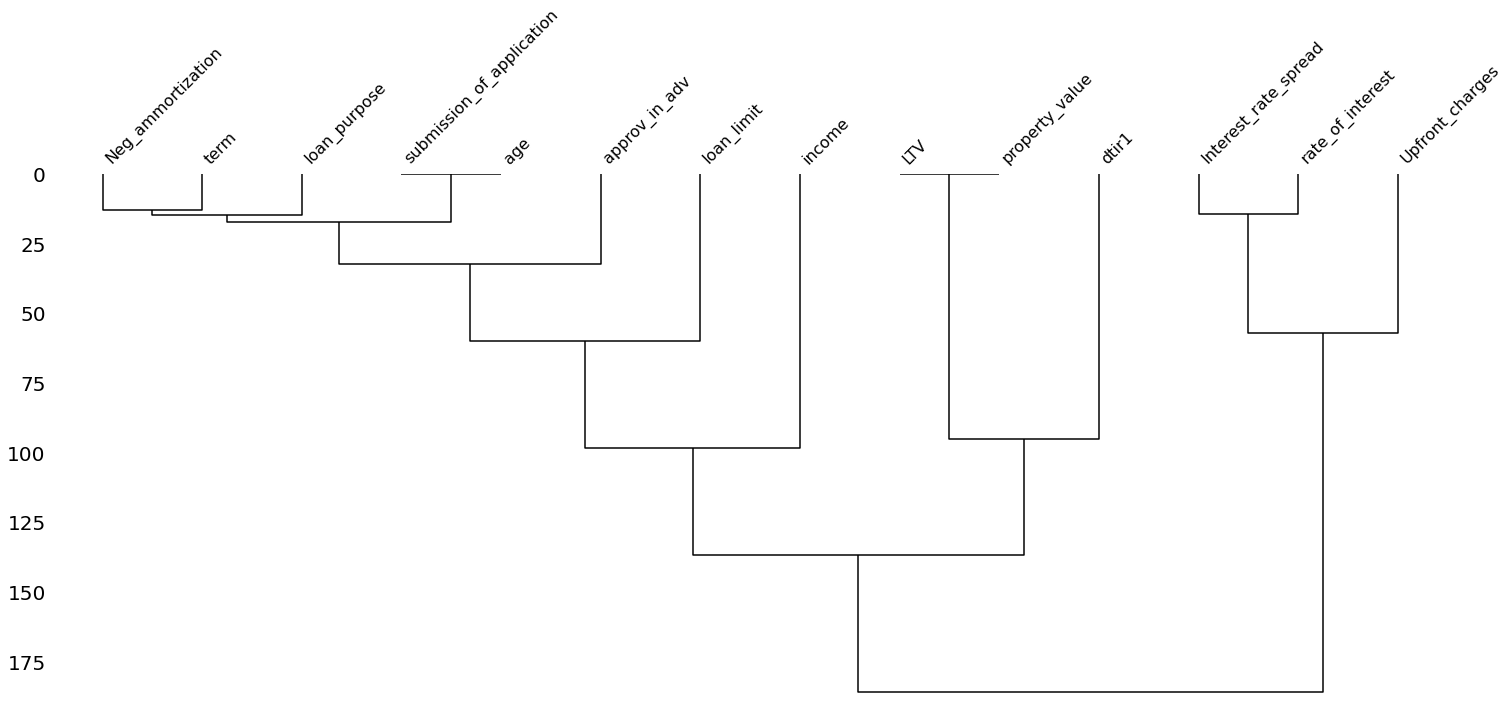

In [22]:
#dendrogram ( hierarchical nullity relationship between columns )
msno.dendrogram(df[missing_column])

In [23]:
# % of missing values
def miss_percent(df):
    total = df.shape[0]
    missing_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
    missing_percent = {}
    for col in missing_columns:
        null_count = df[col].isnull().sum()
        per = (null_count/total) * 100
        missing_percent[col] = per
        print("{} : {} ({}%)".format(col, null_count, round(per, 3)))
    return missing_percent

miss_col = miss_percent(df)

loan_limit : 3344 (2.249%)
approv_in_adv : 908 (0.611%)
loan_purpose : 134 (0.09%)
rate_of_interest : 36439 (24.51%)
Interest_rate_spread : 36639 (24.645%)
Upfront_charges : 39642 (26.664%)
term : 41 (0.028%)
Neg_ammortization : 121 (0.081%)
property_value : 15098 (10.155%)
income : 9150 (6.155%)
age : 200 (0.135%)
submission_of_application : 200 (0.135%)
LTV : 15098 (10.155%)
dtir1 : 24121 (16.225%)


In [24]:
# ------ Handle missing values -------

# Method1 : Deletion 

# if missing values around 80-90% then deletion of that attribute will be good option

df_temp = df.copy()

# delete attribut have more the 25% miss values
attribut_threshold = 25 # 25% in this case

for col, per in miss_col.items():
    if per > attribut_threshold:
        df_temp.drop(col, axis = 1, inplace = True)
        
after_remove = miss_percent(df_temp)

loan_limit : 3344 (2.249%)
approv_in_adv : 908 (0.611%)
loan_purpose : 134 (0.09%)
rate_of_interest : 36439 (24.51%)
Interest_rate_spread : 36639 (24.645%)
term : 41 (0.028%)
Neg_ammortization : 121 (0.081%)
property_value : 15098 (10.155%)
income : 9150 (6.155%)
age : 200 (0.135%)
submission_of_application : 200 (0.135%)
LTV : 15098 (10.155%)
dtir1 : 24121 (16.225%)


In [41]:
del df_temp  # delete the copy

In [44]:
#  ----------- Deletion of the samples ---------

df_temp = df.copy()


In [50]:
# Getting Missing count of each sample            

for idx in range(df_temp.shape[0]):
    df_temp.loc[idx, 'missing_count'] = df_temp.iloc[idx, :]isnull().sum() 
df_temp.head()

In [46]:
# Threshold to remove samples having missing values greater than threshold
SAMPLE_THRESHOLD = 5

print(f"Samples Before Removal : {df_temp.shape[0]}")

df_temp.drop(df_temp[df_temp['missing_count'] > SAMPLE_THRESHOLD].index, axis = 0, inplace = True)

print(f"Samples After Removal : {df_temp.shape[0]}")

Samples Before Removal : 148670
Samples After Removal : 132360


In [ ]:
# Encoding Missingness
1+2